In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## overfitting

In [2]:
x = np.random.rand(6)
y = np.random.rand(6)

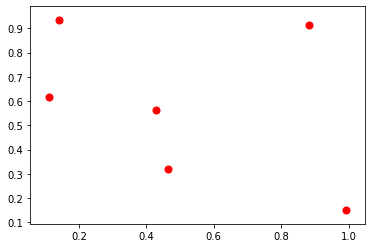

In [3]:
plt.scatter(x,y,c='r',s=50)

In [4]:
def myplot(n=1):
    plt.scatter(x,y,c='r',s=50)
    t = np.linspace(-0.2,1.2,1000)
    plt.plot(t,0.5*np.sin(n*t)+0.5)

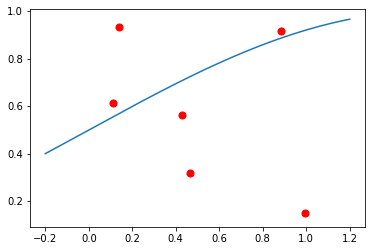

In [5]:
myplot(1)

In [6]:
from ipywidgets import interact

In [7]:
interact(myplot,n=(1,200));

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

## 線性回歸

$$f(x) = 1.2x + 0.8+ \varepsilon$$

In [8]:
x = np.linspace(0,5,200)
y = 1.2*x + 0.8 + 0.3*np.random.randn(200)

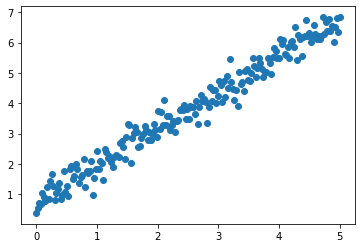

In [9]:
plt.scatter(x,y);

### 分訓練資料和測試資料

In [11]:
from sklearn.model_selection import train_test_split

#### 小重點

機器學習(數據分析), 輸入資料是
$$[x_1, x_2, x_3, .......]$$
喜歡放成
$$[[x_1], [x_2], [x_3], ......]$$
意思就是說本來n維向量,要變成nx1

In [12]:
x.shape

(200,)

In [14]:
x = x.reshape(200,1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
len(x_train)

160

In [18]:
len(x_test)

40

### 準備做線性回歸

所有函數學習,包含線性回歸、機器學習、神經網路都是做三部曲:
1. 開一台函數學習機
2. 訓練
3. 預測

#### step 1. 建立函數學習機

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

#### step 2. 學習(訓練)

In [22]:
model.fit(x_train, y_train) #x為數據 y為答案

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### step 3. 預測

In [25]:
model.predict([[10]])

array([12.7459054])

In [27]:
model.predict([[10],[5]])

array([12.7459054 ,  6.75814089])

In [29]:
y_predict = model.predict(x_test)

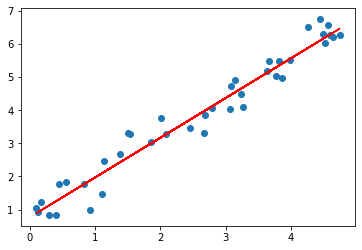

In [30]:
plt.scatter(x_test, y_test);
plt.plot(x_test.ravel(),y_predict, 'r')

## 房價預測

In [32]:
from sklearn.datasets import load_boston

In [34]:
boston_datasets = load_boston

In [36]:
print(boston_datasets.DESCR)  #看詳細資料

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
boston_datasets.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [39]:
len(boston_datasets.feature_names)

13

In [41]:
boston_datasets.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [43]:
boston = pd.DataFrame(boston_datasets.data, columns=boston_datasets.feature_names)

In [44]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
boston['MEDV'] = boston_datasets.target

In [47]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
import seaborn as sns

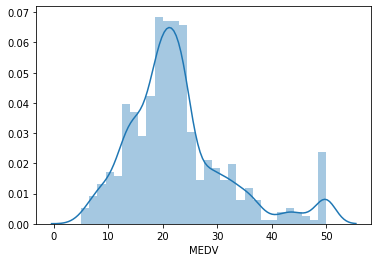

In [51]:
sns.distplot(boston.MEDV, bins=30);

### 準備訓練資料

In [53]:
X = boston.loc[:, "CRIM":"LSTAT"].values #選擇範圍
Y = boston.MEDV

In [54]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
len(x_train)

404

In [57]:
len(x_test)

102

### 數據分析三部曲

#### step 1. 開函數學習機

In [58]:
model = LinearRegression()

### step 2. 訓練

In [59]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 3. 預測

In [60]:
y_predict = model.predict(x_test)

In [63]:
sns.set()  #畫圖會變得更精緻

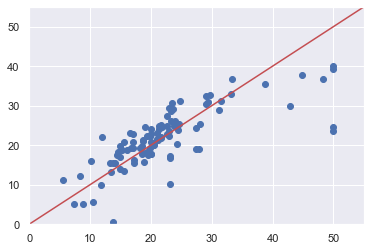

In [69]:
plt.scatter(y_test, y_predict);
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r');

#### [指定作業]

房價資料不用所有的feature去預測

In [70]:
x_train[87]

array([  5.58107,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.436  ,
        87.9    ,   2.3158 ,  24.     , 666.     ,  20.2    , 100.19   ,
        16.22   ])

In [74]:
correlation_matrix = boston.corr().round(2)

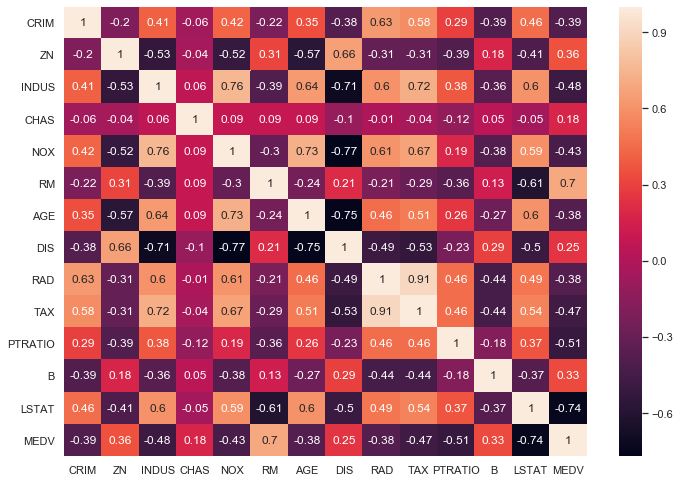

In [80]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})  #調整sns.heatmap大小

sns.heatmap(correlation_matrix, annot=True);  #annot=True會顯示數字